# EDA Project: Data Scientists and the Stack Overflow Developer Survey

## Goals
### Using the stack overflow data, answer these questions: where are data scientists working and who are they working for? How career satisfied are data scientists?

## Assumptions

## Approach

## Data Cleaning

## Identifying Relevant Questions 

## Final Recommendations

## Lessons Learned

## Further Analysis

## Code information

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sm

import re
import folium


%matplotlib inline
pd.options.mode.chained_assignment = None # Turn off warnings

In [95]:
data = pd.read_csv('../data/survey_results_public.csv')

In [96]:
data.shape

(51392, 154)

In [97]:
narrow_data = data[['Professional', 'Country', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
               'CompanySize', 'CompanyType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction']]
narrow_data.head()

,Professional,Country,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction
0,Student,United States,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Student,United Kingdom,Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN
2,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,8.0,9.0
3,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0
4,Professional developer,Switzerland,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,6.0,8.0


In [98]:
def find_ds(a_string):
    try:
        if re.search(r'Data scientist', a_string):
            return 1
        else:
            return 0
    except:
        return 0

In [99]:
narrow_data['DataScientist'] = narrow_data['NonDeveloperType'].apply(find_ds)
narrow_data.head()

,Professional,Country,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,DataScientist
0,Student,United States,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Student,United Kingdom,Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN,0
2,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,8.0,9.0,0
3,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0,1
4,Professional developer,Switzerland,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,6.0,8.0,0


In [100]:
ds_data = narrow_data[narrow_data.DataScientist == 1]
non_ds_data = narrow_data[narrow_data.DataScientist == 0]

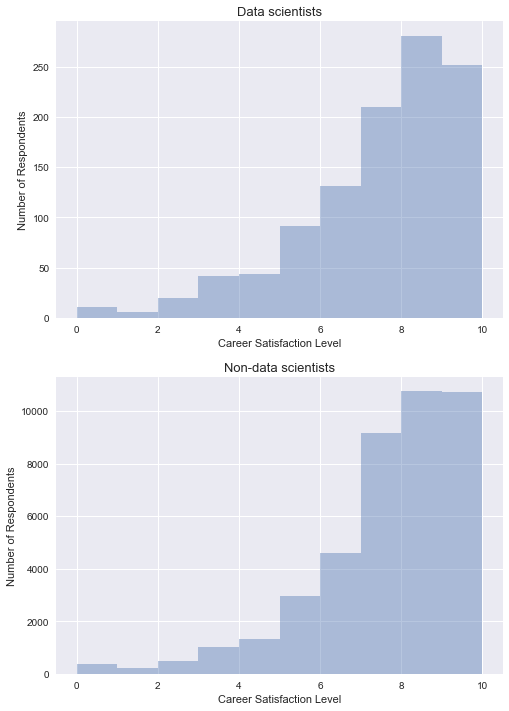

In [101]:
f, (ax1, ax2) = plt.subplots(2, sharex=False, figsize=(8,12))
sns.distplot(ds_data['CareerSatisfaction'].dropna(axis=0), ax=ax1, kde=False, bins=10, 
             axlabel='Career Satisfaction Level')
ax1.set_ylabel('Number of Respondents')
ax1.set_title('Data scientists', fontsize=13)

sns.distplot(non_ds_data['CareerSatisfaction'].dropna(axis=0), ax=ax2, kde=False, bins=10, 
             axlabel='Career Satisfaction Level')
ax2.set_ylabel('Number of Respondents')
ax2.set_title('Non-data scientists', fontsize=13)
ax2.set_xlabel('Career Satisfaction Level')

plt.show()

#### The satisfaction levels of data scientists and non data scientists seem to be about the same -- data scientists are no more or less satisfied with their career than other developers.

In [102]:
ds_countries = ds_data.groupby('Country')['Professional'].count().reset_index()
ds_countries.columns = ['Country', 'Number']
ds_countries = ds_countries.sort_values(['Number'], axis=0, ascending=False)

In [103]:
nonds_countries = non_ds_data.groupby('Country')['Professional'].count().reset_index()
nonds_countries.columns = ['Country', 'Number']
nonds_countries = nonds_countries.sort_values(['Number'], axis=0, ascending=False)

In [104]:
ds_countries = ds_countries[ds_countries.Number >= 10]
nonds_countries = nonds_countries[nonds_countries.Number >= 400]

In [105]:
ds_countries.head(10)

,Country,Number
94,United States,271
31,Germany,121
93,United Kingdom,92
39,India,52
18,Canada,38
71,Poland,27
29,France,27
45,Italy,23
84,Switzerland,23
6,Australia,21


In [106]:
nonds_countries.head(10)

,Country,Number
187,United States,11184
84,India,5145
186,United Kingdom,4303
69,Germany,4022
38,Canada,2195
65,France,1713
142,Poland,1263
13,Australia,892
149,Russian Federation,858
165,Spain,847


In [107]:
x1 = list(ds_countries['Country'][:10])
x2 = list(nonds_countries['Country'][:10])

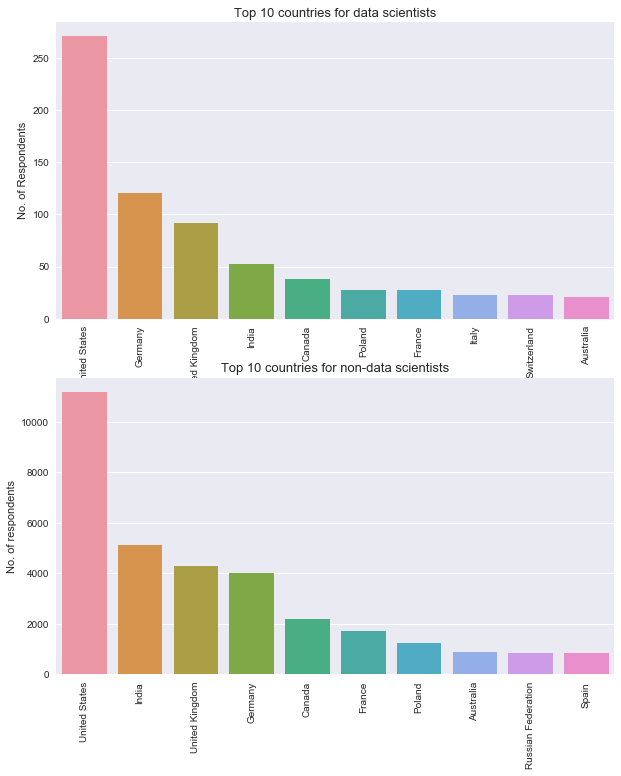

In [108]:
f, (ax1, ax2) = plt.subplots(2, figsize=(10, 12))

ax1 = sns.barplot(x=ds_countries['Country'][:10], y=ds_countries['Number'][:10], ax=ax1)
ax1.set_title('Top 10 countries for data scientists', fontsize=13)
ax1.set_ylabel('No. of Respondents')
ax1.set_xlabel('')
ax1.set_xticklabels(x1, rotation=90)

ax2 = sns.barplot(x=nonds_countries['Country'][:10], y=nonds_countries['Number'][:10], ax=ax2)
ax2.set_title('Top 10 countries for non-data scientists', fontsize=13)
ax2.set_ylabel('No. of respondents')
ax2.set_xticklabels(x2, rotation=90)
ax2.set_xlabel('')

plt.show()

#### Data scientists seem to follow a similar geographic desitribution as non-data scientists - most of the top ten countries for data scientists are also in the top ten list of countries for non-data scientists. 

In [110]:
country_satisfcation = ds_data.groupby('Country')['CareerSatisfaction'].mean()
# How to filter out countries with < 10 data scientists?

In [111]:
country_satisfcation.head(10)

Country
Afghanistan      10.000000
Aland Islands     2.500000
Algeria           7.000000
Angola            6.000000
Antarctica        0.000000
Argentina         8.250000
Australia         6.850000
Austria           7.769231
Azerbaidjan       5.500000
Bangladesh        9.000000
Name: CareerSatisfaction, dtype: float64

#### A chloropleth (geographic heatmap) of data scientist career satisfaction levels by country seen [here](http://www.openheatmap.com/embed.html?map=TrimestralGolemsLepidophloios) 

In [112]:
ds_data['HomeRemote'].unique()

array(['Less than half the time, but at least one day each week',
       'About half the time', "It's complicated", 'A few days each month',
       'Never', "All or almost all the time (I'm full-time remote)", nan,
       'More than half, but not all, the time'], dtype=object)

#### Make a heat map comparing career satisfaction and work from home 

In [220]:
work_from_home = {
                 'Never': 0, "All or almost all the time (I'm full-time remote)": 5, "About half the time": 3,
                 "It's complicated": '.', "Less than half the time, but at least one day each week": 2, 
                 "More than half, but not all, the time": 4, "A few days each month": 1, 
                  }
# drop the "it's complicated" responses since we have no way of knowing what the respondent means by that

In [221]:
def home_remote(key):
    '''takes a string and searcheds for it in the work_from_home dict. If it finds a match, it returns the value,
    else it returns none'''
    try:
        
        home_remote_code = work_from_home[key]
        return home_remote_code
    
    except:
        return '.'

In [224]:
narrow_data['HomeRemoteCode'] = narrow_data['HomeRemote'].apply(lambda x: home_remote(x))
home_remote_data = narrow_data[narrow_data.HomeRemoteCode != '.']
home_remote_data.head()

,Professional,Country,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,DataScientist,HomeRemoteCode
1,Student,United Kingdom,Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN,0,4
2,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,8.0,9.0,0,2
3,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0,1,2
4,Professional developer,Switzerland,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,6.0,8.0,0,0
6,Professional non-developer who sometimes write...,United States,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,Data scientist,7.0,6.0,1,2


In [225]:
ds_data['HomeRemoteCode'] = ds_data['HomeRemote'].apply(lambda x: home_remote(x))
ds_home_remote_data = ds_data[ds_data.HomeRemoteCode != '.']
ds_home_remote_data.head()

,Professional,Country,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,DataScientist,HomeRemoteCode
3,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0,1,2
6,Professional non-developer who sometimes write...,United States,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,Data scientist,7.0,6.0,1,2
528,Professional non-developer who sometimes write...,El Salvador,Employed full-time,Some college/university study without earning ...,A business discipline,About half the time,10 to 19 employees,Publicly-traded corporation,Analyst or consultant; Data scientist,10.0,10.0,1,3
658,Professional non-developer who sometimes write...,United States,Employed full-time,Master's degree,A business discipline,A few days each month,"1,000 to 4,999 employees","Privately-held limited company, not in startup...",Analyst or consultant; Data scientist,8.0,9.0,1,1
766,Professional non-developer who sometimes write...,United States,Employed full-time,Secondary school,NaN,Never,500 to 999 employees,"Privately-held limited company, not in startup...",Analyst or consultant; Data scientist,0.0,2.0,1,0


In [157]:
ci_dict = {}
means_dict = {}

for code in list(range(6)):
    
    ci_dict[code] = sm.DescrStatsW(home_remote_data[home_remote_data.HomeRemoteCode == code].JobSatisfaction.dropna()).zconfint_mean(alpha=0.05)
    means_dict[code] = home_remote_data[home_remote_data.HomeRemoteCode == code].JobSatisfaction.dropna().mean()
    

In [158]:
ci_dict

{0: (6.5927196263782744, 6.6722851370386831),
 1: (7.0446062225902404, 7.1104114548642068),
 2: (7.0544881408171065, 7.1857614691672929),
 3: (6.8598047315491399, 7.0875991794420941),
 4: (6.8449351418033624, 7.0614318993951395),
 5: (7.3237102010243387, 7.4531493031078924)}

In [161]:
ci_list = []
mean_list = []

for code in list(range(6)):
    
    ci = sm.DescrStatsW(home_remote_data[home_remote_data.HomeRemoteCode == code].JobSatisfaction.dropna()).zconfint_mean(alpha=0.05)
    ci_list.append(abs(ci[0]-ci[1]))
    
    mean_list.append(home_remote_data[home_remote_data.HomeRemoteCode == code].JobSatisfaction.dropna().mean())

In [162]:
ci_list

[0.079565510660408734,
 0.065805232273966396,
 0.13127332835018635,
 0.22779444789295411,
 0.21649675759177711,
 0.12943910208355369]

In [228]:
HR_means = home_remote_data.groupby('HomeRemoteCode')[['HomeRemoteCode', 'JobSatisfaction']].mean()
HR_means['Code'] = list(range(6))
HR_means

,JobSatisfaction,Code
HomeRemoteCode,,
0,6.632502,0
1,7.077509,1
2,7.120125,2
3,6.973702,3
4,6.953184,4
5,7.388430,5


In [229]:
ds_HR_means = ds_home_remote_data.groupby('HomeRemoteCode')[['HomeRemoteCode', 'JobSatisfaction']].mean()
ds_HR_means['Code'] = list(range(6))
ds_HR_means

,JobSatisfaction,Code
HomeRemoteCode,,
0,6.762264,0
1,7.062827,1
2,7.152174,2
3,6.906250,3
4,6.102041,4
5,6.536585,5


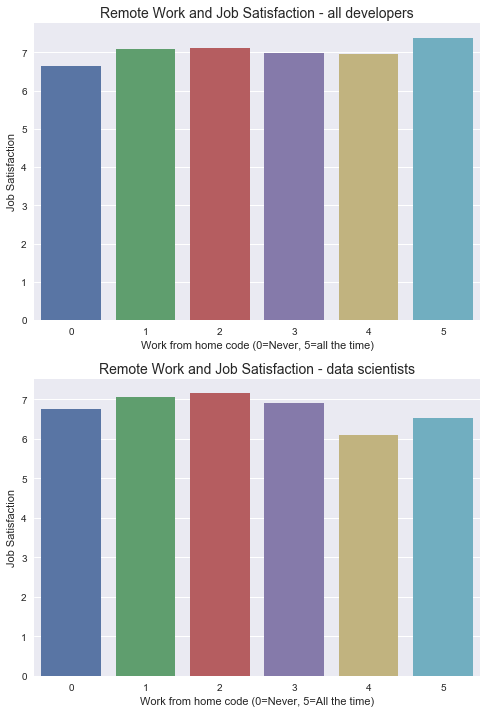

In [256]:
f, (ax1, ax2) = plt.subplots(2, figsize = (8, 12))
sns.set_color_codes('pastel')

sns.barplot(x=HR_means['Code'], y=HR_means['JobSatisfaction'], ci=95, ax=ax1)
ax1.set_title('Remote Work and Job Satisfaction - all developers', fontsize=14)
ax1.set_ylabel('Job Satisfaction')
ax1.set_xlabel('Work from home code (0=Never, 5=all the time)')

sns.barplot(x=ds_HR_means['Code'], y=ds_HR_means['JobSatisfaction'], ci=95, ax=ax2)
ax2.set_title('Remote Work and Job Satisfaction - data scientists', fontsize = 14)
ax2.set_ylabel('Job Satisfaction')
ax2.set_xlabel('Work from home code (0=Never, 5=All the time)')

plt.show()

# Why don't the confidence intervals show on chart?
# Why are the colors so weird?

#### The frequency of working from home does not seem to have a substantial act on employee job satisfaction

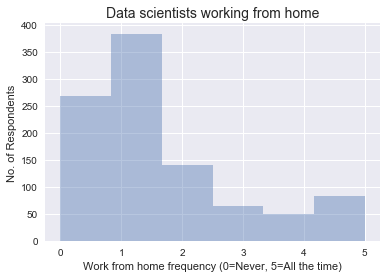

In [257]:
sns.set_color_codes('pastel')

f, ax = plt.subplots()

sns.distplot(ds_home_remote_data['HomeRemoteCode'].dropna(axis=0), bins=6, kde=False)
ax.set_title('Data scientists working from home', fontsize=14)
ax.set_ylabel('No. of Respondents')
ax.set_xlabel('Work from home frequency (0=Never, 5=All the time)')

plt.show()

#### It appears that most data sceintists either never work from home or occasionally work from home. 

In [278]:
js_company_type = ds_data.groupby('CompanyType')['JobSatisfaction'].mean().sort_values()

In [289]:
co_types = ds_data['CompanyType'].unique()
sat_level = []

for type in x:
    co_type = ds_data[ds_data.CompanyType == type]
    avg_sat = co_type['JobSatisfaction'].mean()
    sat_level.append(avg_sat)

sat_level

[7.243589743589744,
 7.113043478260869,
 6.937007874015748,
 6.891891891891892,
 nan,
 6.153846153846154,
 6.794117647058823,
 7.0,
 6.333333333333333,
 6.6571428571428575,
 7.0,
 7.5]

In [285]:
company_sat_level = {'CompanyType': co_types, 'JobSatisfaction': sat_level}

job_sat_df = pd.DataFrame.from_dict(company_sat_level)

In [303]:
sat_sort = job_sat_df.dropna().sort_values('JobSatisfaction', ascending=False)
sat_sort

,CompanyType,JobSatisfaction
11,Pre-series A startup,7.500000
0,Non-profit/non-governmental organization or pr...,7.243590
1,Government agency or public school/university,7.113043
7,"Sole proprietorship or partnership, not in sta...",7.000000
10,Something else,7.000000
2,Publicly-traded corporation,6.937008
3,"Privately-held limited company, not in startup...",6.891892
6,Venture-funded startup,6.794118
9,I prefer not to answer,6.657143
8,I don't know,6.333333


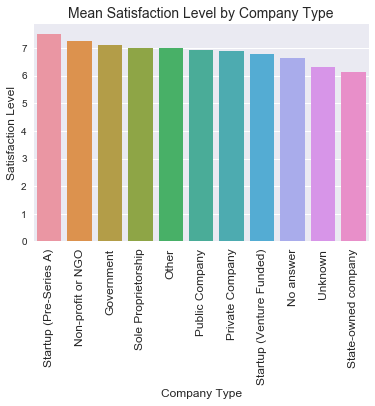

In [313]:
f, ax = plt.subplots()
xlabels = ['Startup (Pre-Series A)', 'Non-profit or NGO', 'Government', 'Sole Proprietorship', 'Other',
          'Public Company', 'Private Company', 'Startup (Venture Funded)', 'No answer', 'Unknown', 
           'State-owned company']

sns.barplot(x=sat_sort['CompanyType'].dropna(), y=sat_sort['JobSatisfaction'].dropna(), ax=ax)
ax.set_xlabel('Company Type', fontsize=12)
ax.set_ylabel('Satisfaction Level', fontsize=12)
ax.set_xticklabels(xlabels, rotation=90, fontsize=12)
ax.set_title('Mean Satisfaction Level by Company Type', fontsize=14)
plt.show()

In [348]:
companies = ds_data.groupby('CompanyType')['Professional'].count().reset_index()
companies.columns = ['CompanyType', 'DataScientists']
#companies.set_index('CompanyType', inplace=True)
companies = companies.sort_values('DataScientists', ascending=False)
companies['NonDataScientists'] = None
companies.head()

,CompanyType,DataScientists,NonDataScientists
5,"Privately-held limited company, not in startup...",262,None
0,Government agency or public school/university,231,None
6,Publicly-traded corporation,128,None
3,Non-profit/non-governmental organization or pr...,78,None
1,I don't know,54,None


In [354]:
def company_type_numbers(co_type):
    sort_by_type = non_ds_data[non_ds_data.CompanyType == co_type]
    return len(sort_by_type)
    
companies['NonDataScientists'] = companies['CompanyType'].apply(lambda x: company_type_numbers(x))    

In [360]:
tot_ds = companies['DataScientists'].sum()
tot_nonds = companies['NonDataScientists'].sum()

In [365]:
def fractions(number, total):
    return number/total

In [391]:
companies['DS_Fraction'] = companies['DataScientists'].apply(lambda x: fractions(x, tot_ds))
companies['NonDS_Fraction'] = companies['NonDataScientists'].apply(lambda x: fractions(x, tot_nonds))

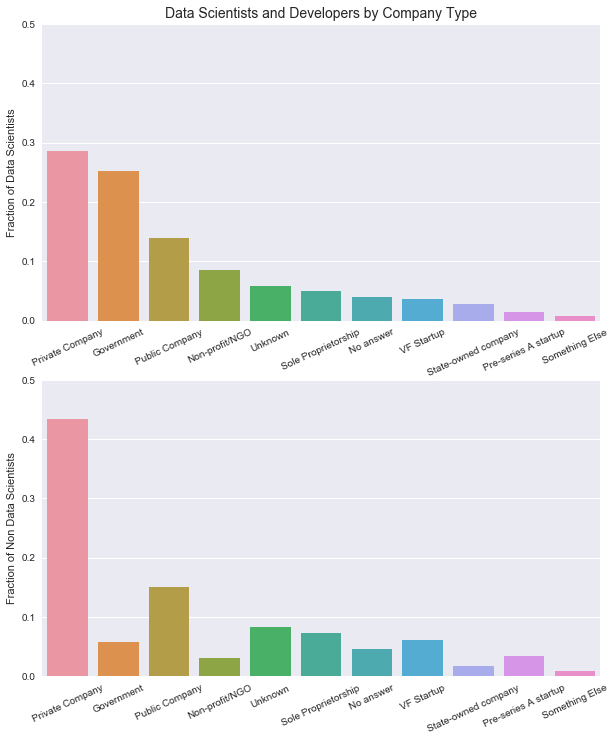

In [390]:
x = ['Private Company', 'Government', 'Public Company', 'Non-profit/NGO', 'Unknown', 'Sole Proprietorship', 'No answer',
            'VF Startup', 'State-owned company', 'Pre-series A startup', 'Something Else']
f, (ax1, ax2) = plt.subplots(2, figsize=(10, 12))
sns.set_color_codes('pastel')

ax1 = sns.barplot(x, y=companies['DS_Fraction'], label='Data Scientists', ax=ax1)
ax1.set_xticklabels(x, rotation=25)
ax1.set_ylabel('Fraction of Data Scientists')
ax1.set_ylim(0, 0.5)
ax1.set_title('Data Scientists and Developers by Company Type', fontsize=14)

ax2 = sns.barplot(x, y=companies['NonDS_Fraction'], label='Non-data Scientists', ax=ax2)
ax2.set_xticklabels(x, rotation=25)
ax2.set_ylabel('Fraction of Non Data Scientists')
ax2.set_ylim(0, 0.5)

plt.show()
# how to get the bars next to each other using seaborn? is this possible?

#### Data scientists are most likely to work in a private company or government while non-data scientists are most likely to work in a private company or public company. Data scientists appear to be more likely to work in a non-profit or NGO compared to non-data scientists while non-data scientists appear to be slightly more likely to work at a startup. Satisfaction levels amoung data scientists are relatively high for all company types; employees at state owned companies seem to be the least satisfied while those at early stage startups (pre-series A) seem to be most satisfied. 

In [273]:
ds_data.groupby('FormalEducation')[['CareerSatisfaction', 'JobSatisfaction']].mean()

,CareerSatisfaction,JobSatisfaction
FormalEducation,,
Bachelor's degree,6.944272,6.693069
Doctoral degree,7.521212,7.341772
I never completed any formal education,5.900000,7.000000
I prefer not to answer,6.615385,8.000000
Master's degree,7.173267,6.971129
Primary/elementary school,4.500000,5.000000
Professional degree,7.785714,6.785714
Secondary school,6.945946,6.303030
Some college/university study without earning a bachelor's degree,6.677686,6.531532
